## Import the data

In [1]:
data = read.csv(file = "data.csv")
df = data.frame(data)
head(df)
test_data = read.csv(file = "testdata.csv")
head(test_data)

X,Time,Speed_ms,Temperature_C,Humidity,Solar_Irradiance_Wm2,Power_Watt
1,2020-01-09 10:00:00,0.743,-3.092,43.48,59.48,-0.69527077
2,2020-01-09 10:10:00,0.458,-2.813,42.88,60.62,-0.26894369
3,2020-01-09 10:20:00,0.350,-2.219,41.58,66.71,-0.03266857
4,2020-01-09 10:30:00,0.598,-1.933,40.30,66.54,0.39081452
5,2020-01-09 10:40:00,0.809,-2.249,40.23,64.71,-0.47008277
6,2020-01-09 10:50:00,0.822,-2.279,40.18,69.12,0.60388749


X,Time,Speed_ms,Temperature_C,Humidity,Solar_Irradiance_Wm2,Power_Watt
1,NA,0.911,-0.120,88.10,0.00,NA
2,NA,0.940,5.938,88.80,0.00,NA
3,NA,2.179,19.500,59.04,20.03,NA
4,NA,1.315,-4.902,51.25,0.00,NA
5,NA,0.212,6.228,63.02,0.00,NA
6,NA,1.087,2.380,60.32,0.00,NA


## Preliminary Analysis

### Plot of power against speed  

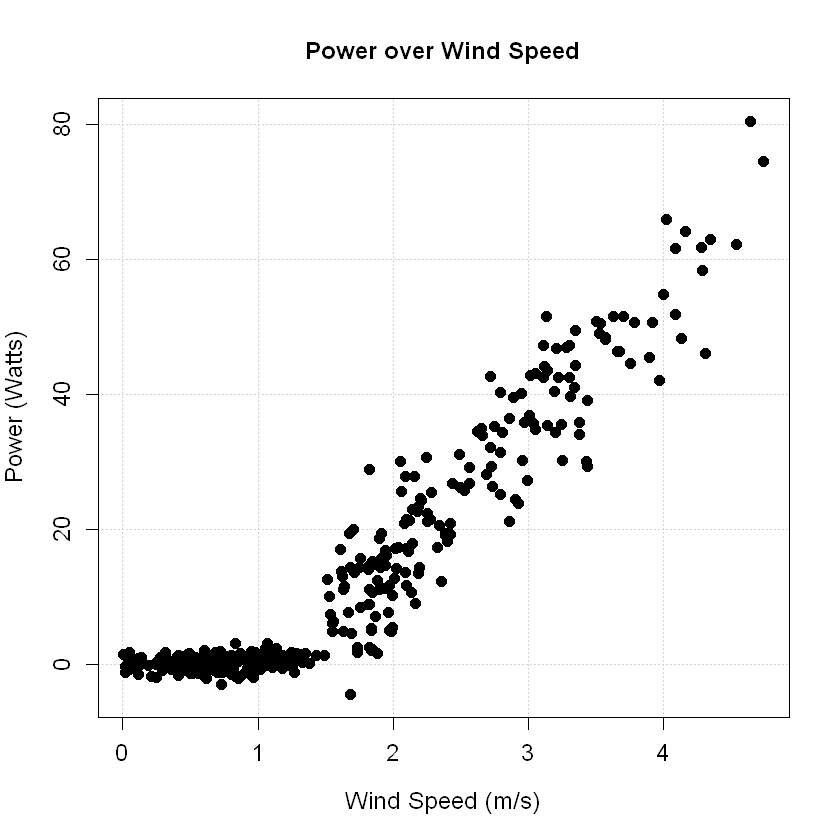

In [2]:
plot(df$Speed_ms,df$Power_Watt,main="Power over Wind Speed",xlab="Wind Speed (m/s)",ylab="Power (Watts)",cex=1.2,cex.axis=1.2,cex.lab=1.2,pch=19,col="black",panel.first=grid())

### Daytime solar irradiance versus speed

[1] -0.09955396

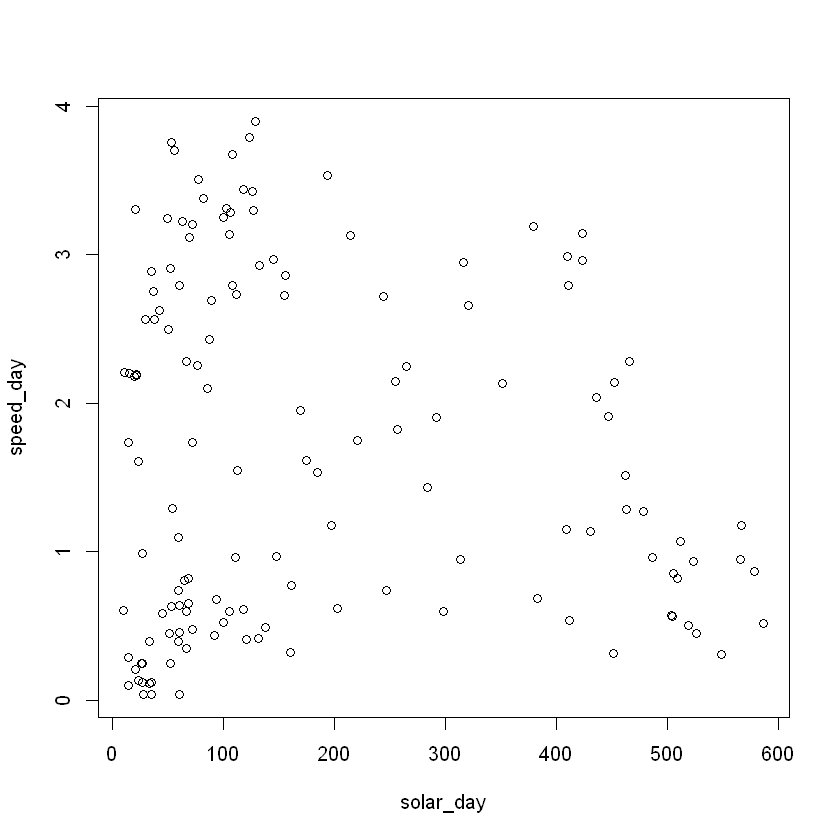

In [3]:
solar_day = df$Solar_Irradiance_Wm2[-which(df$Solar_Irradiance_Wm2 <= 10)]
speed_day = df$Speed_ms[-which(df$Solar_Irradiance_Wm2 <= 10)]
power_day = df$Power_Watt[-which(df$Solar_Irradiance_Wm2 <= 10)]

plot(solar_day, speed_day)
cor(solar_day, speed_day)

### Daytime solar irradiance versus power

[1] -0.1683437

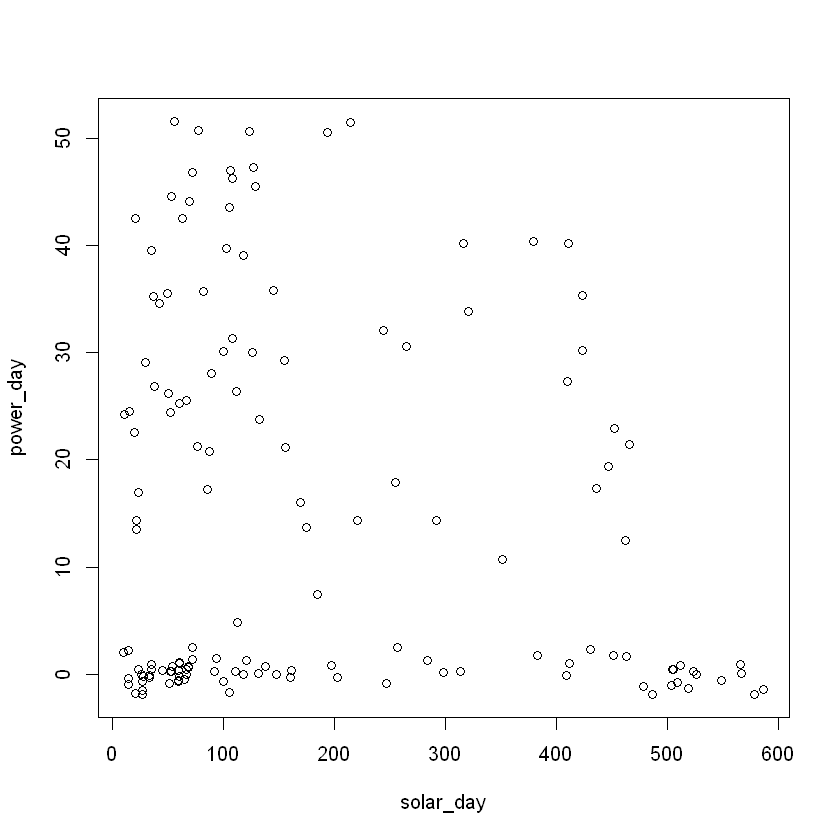

In [4]:
plot(solar_day, power_day)
cor(solar_day, power_day) 

### Correlation of features

In [5]:
cor(df[3:7])

,Speed_ms,Temperature_C,Humidity,Solar_Irradiance_Wm2,Power_Watt
Speed_ms,1.00000000,0.73863227,0.1936181,-0.01579759,0.93408094
Temperature_C,0.73863227,1.00000000,0.4966482,-0.08514597,0.70508284
Humidity,0.19361809,0.49664817,1.0000000,-0.47244713,0.22154504
Solar_Irradiance_Wm2,-0.01579759,-0.08514597,-0.4724471,1.00000000,-0.01881058
Power_Watt,0.93408094,0.70508284,0.2215450,-0.01881058,1.00000000


### Plotting the features in the test data

null device 
          1

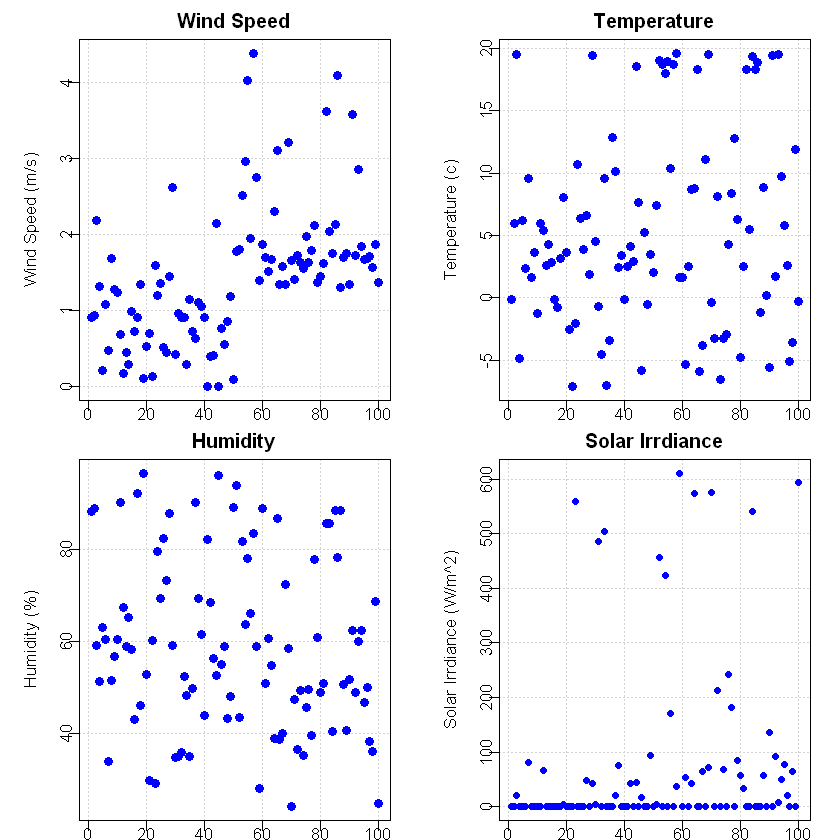

In [6]:
par(mfrow=c(2,2), mar=c(1,4,2,1.5), mgp=c(2,0.2,0))
plot(test_data$Speed_ms,main="Wind Speed",xlab="Index",ylab="Wind Speed (m/s)",cex=1.2,cex.axis=1,cex.lab=1,pch=19,col="blue",panel.first=grid())
plot(test_data$Temperature_C,main="Temperature",xlab="Index",ylab="Temperature (c)",cex=1.2,cex.axis=1,cex.lab=1,pch=19,col="blue",panel.first=grid())
plot(test_data$Humidity,main="Humidity",xlab="Index",ylab="Humidity (%)",cex=1.2,cex.axis=1,cex.lab=1,pch=19,col="blue",panel.first=grid())
plot(test_data$Solar_Irradiance_Wm2,main="Solar Irrdiance",xlab="Index",ylab="Solar Irrdiance (W/m^2)",cex=1,cex.axis=1,cex.lab=1,pch=19,col="blue",panel.first=grid())
dev.off()
par(mfrow=c(1,1), mar=c(5.1,4.1,4.1,2.1), mgp=c(3,1,0)) # for original plot

## Model Building
Linear and Polynomial Regression 

In [7]:
#testing a basic linear model
lin.mod = lm(df$Power_Watt~df$Speed_ms,data=df) 
pred1=predict(object=lin.mod,newdata=df)

# testing a polynomial model
poly.mod=lm(df$Power_Watt~poly(df$Speed_ms, degree=3, raw= TRUE), data=df) 
summary(poly.mod)
pred2=predict(object=poly.mod,newdata=df)


Call:
lm(formula = df$Power_Watt ~ poly(df$Speed_ms, degree = 3, raw = TRUE), 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4845  -1.8598   0.0658   1.6524  17.5309 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                                  1.8935     0.8362   2.264   0.0241
poly(df$Speed_ms, degree = 3, raw = TRUE)1 -10.9099     1.7225  -6.334 6.72e-10
poly(df$Speed_ms, degree = 3, raw = TRUE)2  11.1374     0.9382  11.871  < 2e-16
poly(df$Speed_ms, degree = 3, raw = TRUE)3  -1.2613     0.1440  -8.760  < 2e-16
                                              
(Intercept)                                *  
poly(df$Speed_ms, degree = 3, raw = TRUE)1 ***
poly(df$Speed_ms, degree = 3, raw = TRUE)2 ***
poly(df$Speed_ms, degree = 3, raw = TRUE)3 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.501 on 383 degrees of freedom
Multiple R-squared:  0.935

### Splitting the data into train and test sets

In [8]:
train.data = df[seq(1,round(length(df$Time)*0.7,digits=0),1),]# portion of the data to train 
test.data = df[(seq(round(length(df$Time)*0.7,digits=0)+1,length(df$X),1)),] #portion of the data to test

### Initializing the Mean Square Error vectors

In [9]:
MSE1 = MSE2 = MSE3= MSE4 = vector(length = length(df$X))

### Performing Leave One Out Cross Validation for each model

In [10]:
for(i in 1:length(df$X)){
  test.id =i
  train.data = df[-test.id,] # portion of the data to train 
  test.data = df[test.id,]

  # model 1: P1= f(V) + error
  model1 = lm(Power_Watt~Speed_ms,data=train.data)
  pred1= predict(object= model1,newdata = test.data) # prediction model 1
  MSE1[i]= mean((pred1-test.data$Power_Watt)^2) # MSE model 1
  
  # model 2: P1= f(V,Temp) + error
  model2 = lm(Power_Watt~Speed_ms+Temperature_C,data=train.data) 
  pred2= predict(object=model2,newdata=test.data) # prediction model 2
  MSE2[i]= (pred2-test.data$Power_Watt)^2 # MSE model 2
  
  # model 3: P1= f(V,V^2,V^3) + error
  model3 = lm(Power_Watt~Speed_ms+I(Speed_ms^2)+I(Speed_ms^3),data=train.data)
  pred3= predict(object=model3,newdata=test.data) # prediction model 3
  MSE3[i]= (pred3-test.data$Power_Watt)^2 # MSE of model 3
  
  # model 4: P1= f(V,V^2,V^3,Temp) + error
  model4 = lm(Power_Watt~Speed_ms+I(Speed_ms^2)+I(Speed_ms^3)+Temperature_C,data=train.data)
  pred4= predict(object=model4,newdata=test.data) # prediction model 3
  MSE4[i]= (pred4-test.data$Power_Watt)^2 # MSE of model 3

}

### Calculating the Mean Square Error for each Model

In [11]:
# MSE model 1
MSE1=mean(MSE1) 
print(paste('Model 1 MSE:', MSE1))

# MSE model 2
MSE2=mean(MSE2) 
print(paste('Model 2 MSE:', MSE2))

# MSE model 3
MSE3=mean(MSE3) 
print(paste('Model 3 MSE:', MSE3))

# MSE model 4
MSE4=mean(MSE4)
print(paste('Model 4 MSE:', MSE4))

[1] "Model 1 MSE: 40.3120676148111"
[1] "Model 2 MSE: 40.3665298780403"
[1] "Model 3 MSE: 20.8260485342079"
[1] "Model 4 MSE: 20.8012725806224"


### Creating a Table of MSEs for all models

In [12]:
MSEVec = data.frame(MSE1,MSE2,MSE3,MSE4)
colnames(MSEVec) = c("Model1","Model2","Model3","Model4")
rownames(MSEVec) = c("MSE")
MSEVec

,Model1,Model2,Model3,Model4
MSE,40.31207,40.36653,20.82605,20.80127


### Training the models on all of the data

In [13]:

model1_all = lm(Power_Watt~Speed_ms,data) # model 1: P1= f(V) + error
model2_all = lm(Power_Watt~Speed_ms+Temperature_C,data) # model 2: P1= f(V,Temp) + error
model3_all = lm(Power_Watt~Speed_ms+I(Speed_ms^2)+I(Speed_ms^3),data) # model 3: P1= f(V,V^2,V^3) + error
model4_all = lm(Power_Watt~Speed_ms+I(Speed_ms^2)+I(Speed_ms^3)+Temperature_C,data) # model 4: P1= f(V,V^2,V^3,Temp) + error

### Predictions for each model

In [14]:
pred1_all = predict(object = model1_all, newdata = data)
pred2_all = predict(object = model2_all, newdata = data)
pred3_all = predict(object = model3_all, newdata = data)
pred4_all = predict(object = model4_all, newdata = data)

### Plotting the four regression models

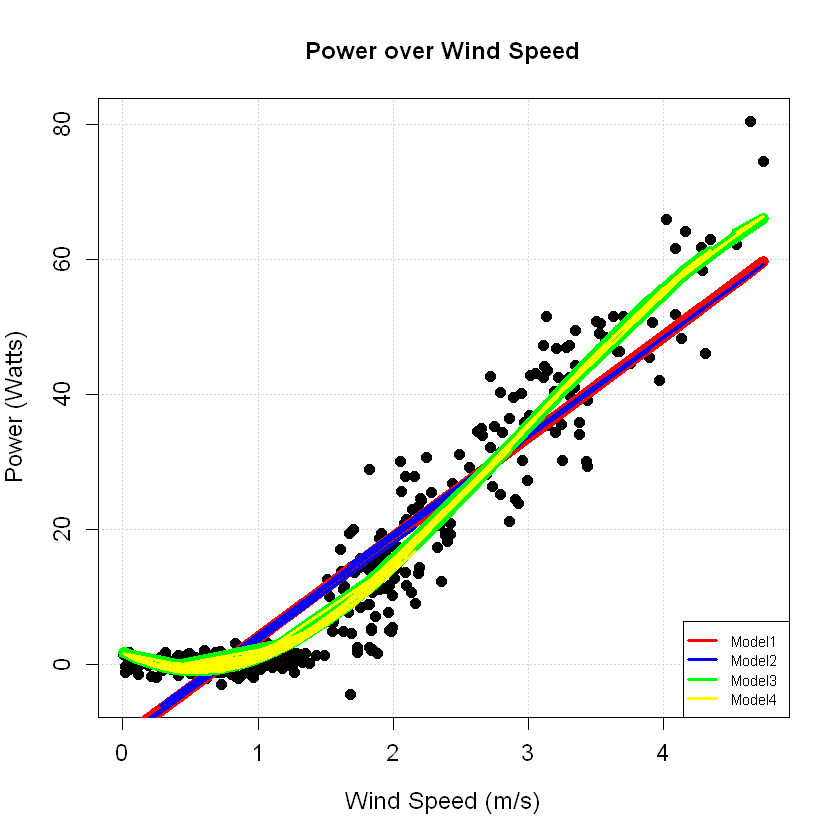

In [15]:
plot(df$Speed_ms,df$Power_Watt,main="Power over Wind Speed",xlab="Wind Speed (m/s)",ylab="Power (Watts)",cex=1.2,cex.axis=1.2,cex.lab=1.2,pch=19,col="black",panel.first=grid())
lines(data$Speed_ms,pred1_all,col="red",lwd=9)
lines(data$Speed_ms,pred2_all,col="blue",lwd=3)
lines(data$Speed_ms,pred3_all,col="green",lwd=9)
lines(data$Speed_ms,pred4_all,col="yellow",lwd=3)
legend("bottomright",legend=c("Model1","Model2","Model3","Model4"),col=c("red","blue","green","yellow"),lwd=c(3,3),pch=c(NA,NA),cex=.75)

### Creating a table for the coefficients of each model

In [16]:
myList = list(coef(model1_all), coef(model2_all), coef(model3_all),coef(model4_all))

table = data.frame()
for(i in seq(along=myList)) for(j in names(myList[[i]])){
  table[i,j] <- myList[[i]][j]
}

rownames(table) = c("model1","model2","model3","model4")
colnames(table) = c("Intercept","Speed_ms","Temperature","Speed_ms ^2","Speed_ms ^3")

table

,Intercept,Speed_ms,Temperature,Speed_ms ^2,Speed_ms ^3
model1,-10.990168,14.90426,NA,NA,NA
model2,-11.001393,14.51158,0.07502234,NA,NA
model3,1.893481,-10.90988,NA,11.13745,-1.261277
model4,1.756200,-10.84799,0.06740196,10.85846,-1.213707


### Model 4 has performed the best out of the current models
It has the lowest MSE of all the models we have tested so far

In [17]:
fin.mod =lm(Power_Watt~poly(Speed_ms, degree=3, raw= TRUE)+Temperature_C,data=data)
summary(fin.mod)


Call:
lm(formula = Power_Watt ~ poly(Speed_ms, degree = 3, raw = TRUE) + 
    Temperature_C, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4517  -1.7998   0.0608   1.6454  18.2633 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               1.75620    0.83966   2.092   0.0371
poly(Speed_ms, degree = 3, raw = TRUE)1 -10.84799    1.72009  -6.307 7.89e-10
poly(Speed_ms, degree = 3, raw = TRUE)2  10.85846    0.95443  11.377  < 2e-16
poly(Speed_ms, degree = 3, raw = TRUE)3  -1.21371    0.14712  -8.250 2.59e-15
Temperature_C                             0.06740    0.04438   1.519   0.1297
                                           
(Intercept)                             *  
poly(Speed_ms, degree = 3, raw = TRUE)1 ***
poly(Speed_ms, degree = 3, raw = TRUE)2 ***
poly(Speed_ms, degree = 3, raw = TRUE)3 ***
Temperature_C                              
---
Signif. codes:  0 '***' 0.001 '**' 0.0

## Testing additional models that use different regression techniques
loading in package glmnet

In [18]:
library(glmnet)

Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Loaded glmnet 4.1-1


### Formulating the features and the target for the following models

In [19]:
df2 = data.frame(data$Speed_ms,data$Speed_ms^2,data$Speed_ms^3,data$Temperature_C,data$Power_Watt,data$Humidity)
y = data.matrix(df2[5])
head(y)

data.Power_Watt
-0.69527077
-0.26894369
-0.03266857
0.39081452
-0.47008277
0.60388749


In [20]:
x = data.matrix(df2[1:4])
head(x)

data.Speed_ms,data.Speed_ms.2,data.Speed_ms.3,data.Temperature_C
0.743,0.552049,0.41017241,-3.092
0.458,0.209764,0.09607191,-2.813
0.350,0.122500,0.04287500,-2.219
0.598,0.357604,0.21384719,-1.933
0.809,0.654481,0.52947513,-2.249
0.822,0.675684,0.55541225,-2.279


### Using 70-30 train test split

In [21]:
set.seed(123)
train.id = sample(1:length(df2$data.Speed_ms),size=0.7*length(df2$data.Speed_ms))
x.train = x[train.id,]
x.test = x[-train.id,]
y.train = y[train.id,]
y.test = y[-train.id,]

### Ridge regression

           Length Class  Mode     
lambda     100    -none- numeric  
cvm        100    -none- numeric  
cvsd       100    -none- numeric  
cvup       100    -none- numeric  
cvlo       100    -none- numeric  
nzero      100    -none- numeric  
call         6    -none- call     
name         1    -none- character
glmnet.fit  12    elnet  list     
lambda.min   1    -none- numeric  
lambda.1se   1    -none- numeric  
index        2    -none- numeric  

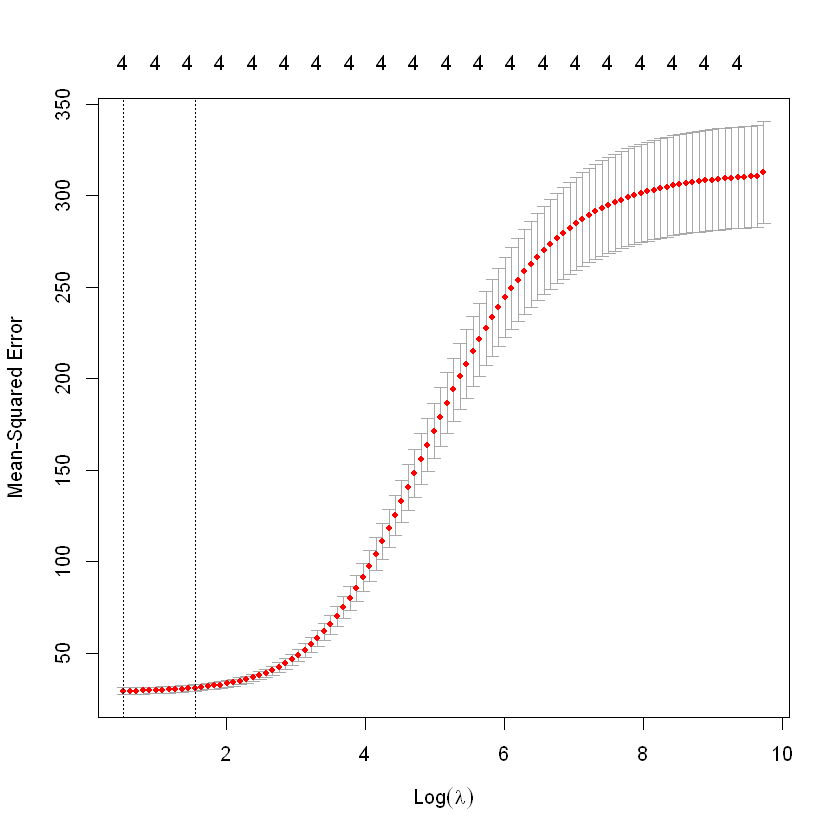

In [22]:
set.seed(123)
ridge = cv.glmnet(x.train, y.train, alpha = 0, type.measure = "mse", family="gaussian") # 10 fold cross validation
summary(ridge)
plot(ridge)

### Prediction and evaluation of Ridge model

In [23]:
pred.ridge = predict(ridge, s=ridge$lambda.1se, newx=x.test)
MSE.ridge = mean((y.test-pred.ridge)^2)
MSE.ridge
# NRMSE of ridge model
100*sqrt(MSE.ridge)/(max(x.train,na.rm=T) - min(x.train,na.rm=T))

[1] 20.00719

[1] 4.643455

### Lasso Regression

           Length Class  Mode     
lambda     56     -none- numeric  
cvm        56     -none- numeric  
cvsd       56     -none- numeric  
cvup       56     -none- numeric  
cvlo       56     -none- numeric  
nzero      56     -none- numeric  
call        6     -none- call     
name        1     -none- character
glmnet.fit 12     elnet  list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  
index       2     -none- numeric  

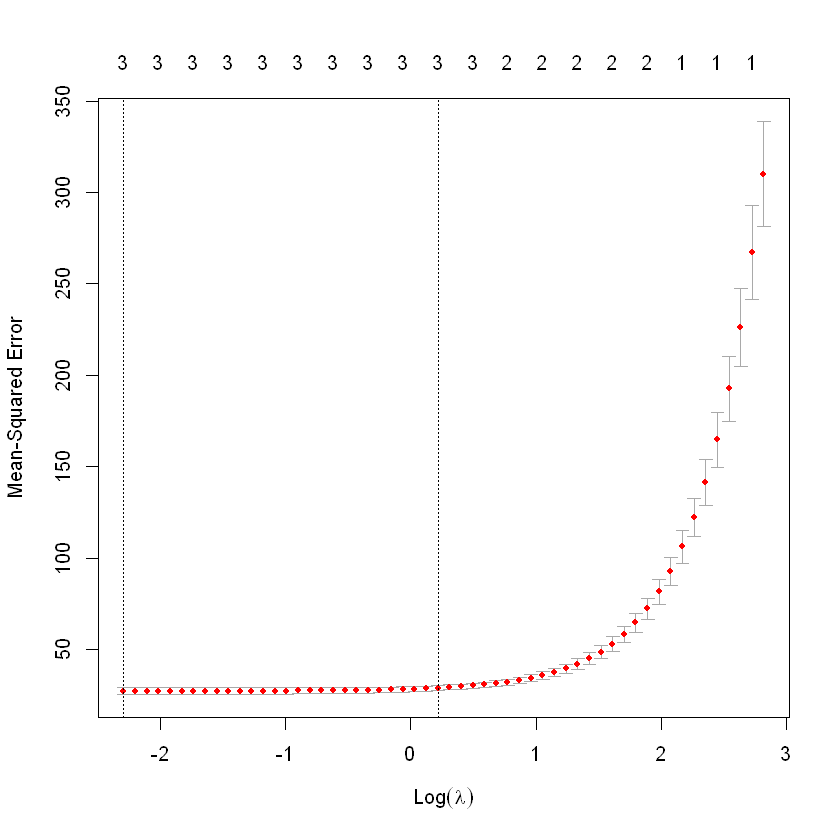

In [24]:
set.seed(123)
lasso = cv.glmnet(x.train, y.train, alpha = 1, type.measure = "mse", family="gaussian") # 10 fold cross validation
summary(lasso)
plot(lasso)

### Prediction and evaluation of Lasso model

In [25]:
pred.lasso = predict(lasso, s=lasso$lambda.1se, newx=x.test)
MSE.lasso = mean((y.test-pred.lasso)^2)
MSE.lasso
# NRMSE of ridge model
100*sqrt(MSE.lasso)/(max(x.train,na.rm=T) - min(x.train,na.rm=T)) 

[1] 18.97944

[1] 4.522618

### Elastic-Net Model

           Length Class  Mode     
lambda     100    -none- numeric  
cvm        100    -none- numeric  
cvsd       100    -none- numeric  
cvup       100    -none- numeric  
cvlo       100    -none- numeric  
nzero      100    -none- numeric  
call         6    -none- call     
name         1    -none- character
glmnet.fit  12    elnet  list     
lambda.min   1    -none- numeric  
lambda.1se   1    -none- numeric  
index        2    -none- numeric  

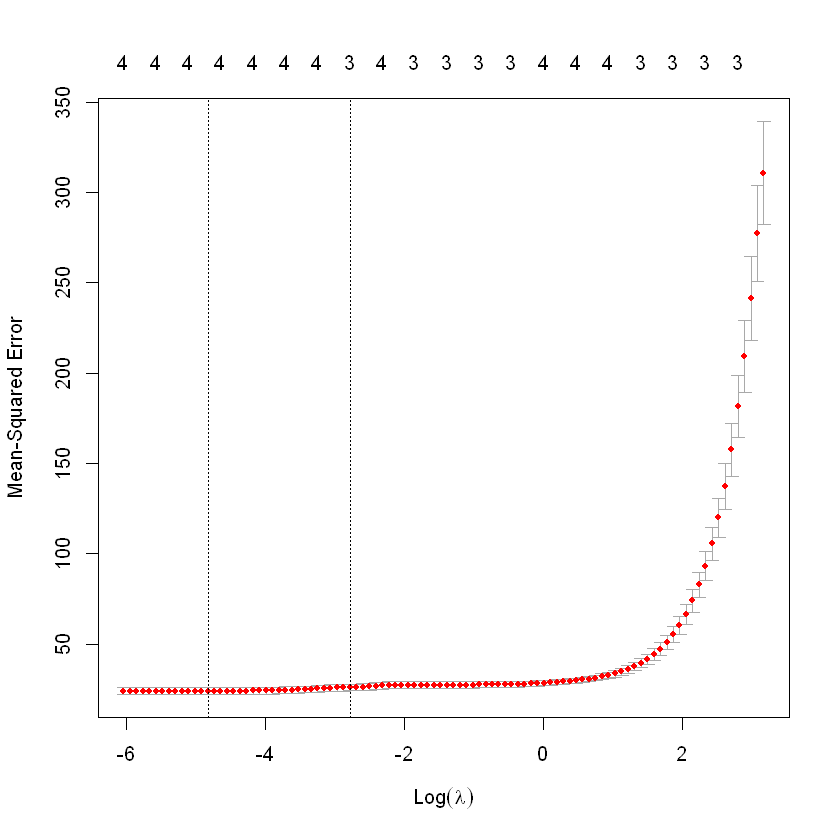

In [26]:
set.seed(123)
elastic.net =cv.glmnet(x.train, y.train, alpha = 0.7, type.measure = "mse", family="gaussian") # 10 fold cross validation
summary(elastic.net)
plot(elastic.net)

### Prediction and evaluation of Elastic-Net model

In [27]:
pred.elastic = predict(elastic.net, s=elastic.net$lambda.1se, newx=x.test)
MSE.elastic = mean((y.test-pred.elastic)^2)
MSE.elastic
# NRMSE of elastic-net model
100*sqrt(MSE.elastic)/(max(x.train,na.rm=T) - min(x.train,na.rm=T)) 

[1] 16.68232

[1] 4.240103

### Ridge Model Coefficents

In [28]:
lam_ridge = ridge$lambda.1se
fin_ridge = glmnet(x, y, alpha = 0, family="gaussian")
coef_ridge = predict(fin_ridge, type = "coefficients", s=lam_ridge)
coef_ridge 

5 x 1 sparse Matrix of class "dgCMatrix"
                            1
(Intercept)        -3.3019384
data.Speed_ms       4.3036038
data.Speed_ms.2     1.1335826
data.Speed_ms.3     0.2483023
data.Temperature_C  0.2610736

### Lasso Model Coefficents

In [29]:
lam_lasso = lasso$lambda.1se
fin_lasso = glmnet(x, y, alpha = 1, family="gaussian")
coef_lasso = predict(fin_lasso, type = "coefficients", s=lam_lasso)
coef_lasso

5 x 1 sparse Matrix of class "dgCMatrix"
                             1
(Intercept)        -1.75696428
data.Speed_ms       1.89602879
data.Speed_ms.2     2.93614177
data.Speed_ms.3     .         
data.Temperature_C  0.04912573

### Elastic-Net Model Coefficents

In [30]:
lam_elastic.net = elastic.net$lambda.1se
fin_elastic.net = glmnet(x, y, alpha = 0.7, family="gaussian")
coef_elastic.net = predict(fin_elastic.net, type = "coefficients", s=lam_elastic.net)
coef_elastic.net

5 x 1 sparse Matrix of class "dgCMatrix"
                            1
(Intercept)        -3.1675208
data.Speed_ms       2.0542562
data.Speed_ms.2     3.0455457
data.Speed_ms.3     .        
data.Temperature_C  0.1378312

### Using the best model for each method for predictions

In [31]:
best_ridge = ridge$glmnet.fit 
best_lasso = lasso$glmnet.fit
best_elastic.net = elastic.net$glmnet.fit

pred_ridge = predict(best_ridge, s=lam_ridge, newx=x)
pred_lasso = predict(best_lasso, s=lam_lasso, newx=x)
pred_elastic.net = predict(best_elastic.net, s=lam_elastic.net, newx=x)

### Plotting the models for each method

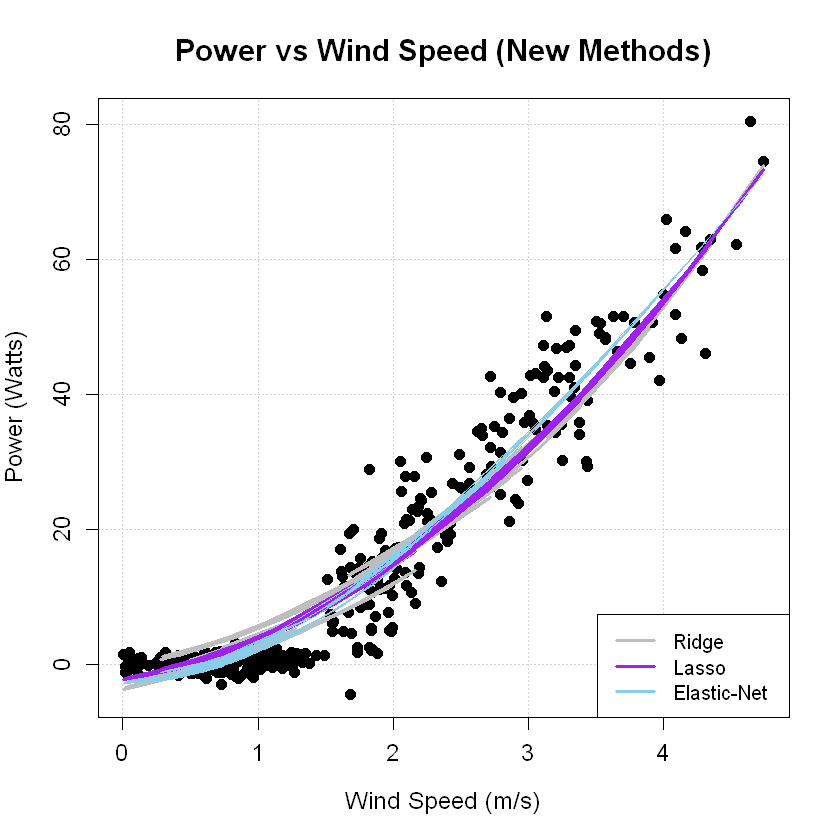

In [32]:
plot(df$Speed_ms,df$Power_Watt,xlab="Wind Speed (m/s)",ylab="Power (Watts)",cex.main= 1.5,cex=1.2,cex.axis=1.2,cex.lab=1.2,pch=19,col="black",panel.first=grid(), main= "Power vs Wind Speed (New Methods)")
lines(df$Speed_ms,pred_ridge,col="gray",lwd=3)
lines(df$Speed_ms,pred_lasso, col="purple",lwd=3)
lines(df$Speed_ms,pred_elastic.net, col="skyblue")

legend(legend=c("Ridge","Lasso", "Elastic-Net"), 
       col=c("gray", "purple", "skyblue" ),"bottomright", lwd=3, cex=1)

__The Elastic-Net model performed the best out of all models tested__

## Final Prediction

### Defining the features being used for the final prediction on the test data 

In [33]:
df_fin = data.frame(test_data$Speed_ms, test_data$Speed_ms^2, test_data$Speed_ms^3, test_data$Temperature_C)
head(df_fin)
matrix_test = data.matrix(df_fin)
head(matrix_test)

test_data.Speed_ms,test_data.Speed_ms.2,test_data.Speed_ms.3,test_data.Temperature_C
0.911,0.829921,0.756058031,-0.120
0.940,0.883600,0.830584000,5.938
2.179,4.748041,10.345981339,19.500
1.315,1.729225,2.273930875,-4.902
0.212,0.044944,0.009528128,6.228
1.087,1.181569,1.284365503,2.380


test_data.Speed_ms,test_data.Speed_ms.2,test_data.Speed_ms.3,test_data.Temperature_C
0.911,0.829921,0.756058031,-0.120
0.940,0.883600,0.830584000,5.938
2.179,4.748041,10.345981339,19.500
1.315,1.729225,2.273930875,-4.902
0.212,0.044944,0.009528128,6.228
1.087,1.181569,1.284365503,2.380


### Final prediction using the best model

In [34]:
fin_pred = predict(best_elastic.net, s=lam_elastic.net, newx= matrix_test)
head(fin_pred)

1
1.173761
2.020679
18.969769
4.552290
-1.751087
2.957608


### Plotting the power predictions

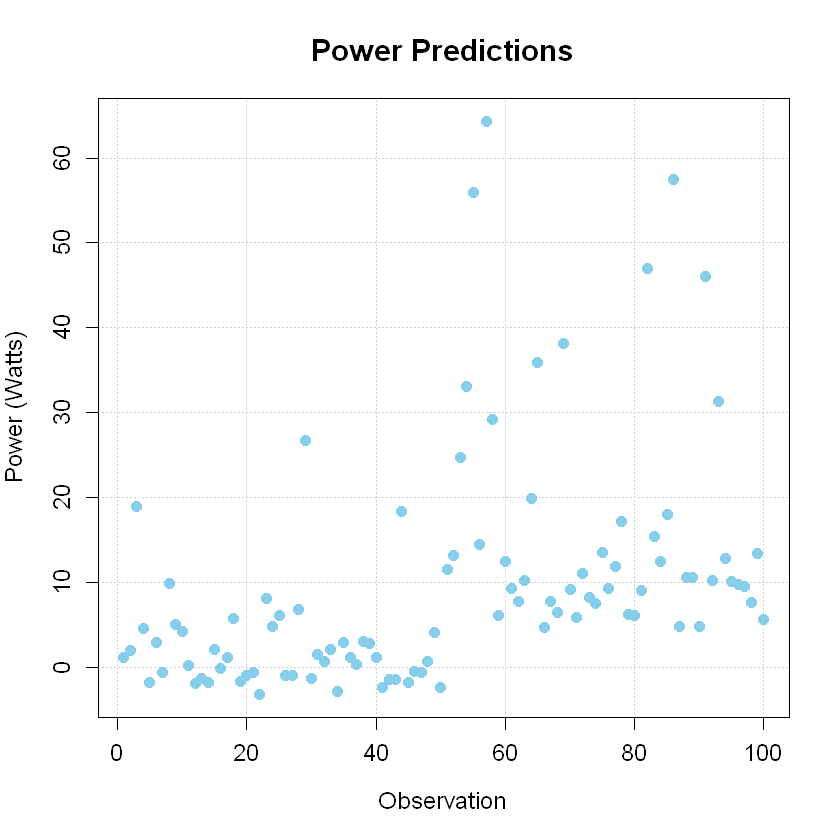

In [35]:
plot(fin_pred,xlab="Observation",ylab="Power (Watts)",cex.main= 1.5,cex=1.2,cex.axis=1.2,cex.lab=1.2,pch=19,col="skyblue",panel.first=grid(), main= "Power Predictions")

### Plotting the Power Prediction vs Wind Speed 

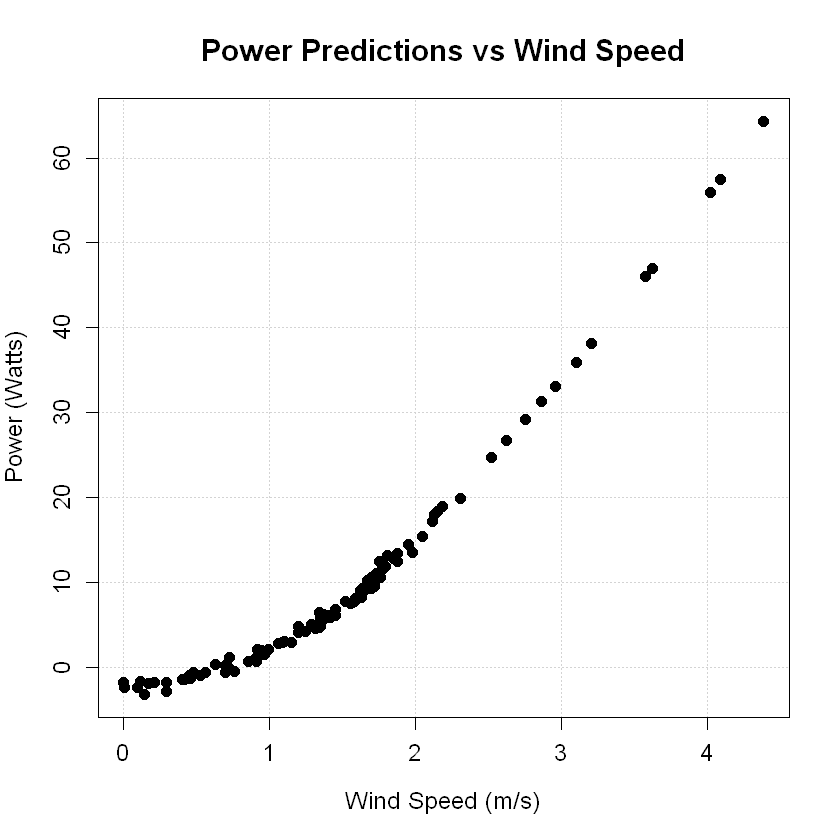

In [36]:
plot(test_data$Speed_ms, fin_pred,xlab="Wind Speed (m/s)",ylab="Power (Watts)",cex.main= 1.5,cex=1.2,cex.axis=1.2,cex.lab=1.2,pch=19,col="black",panel.first=grid(), main= "Power Predictions vs Wind Speed")

### Storing the Results in a DataFrame

In [37]:
final = data.frame(test_data[1:6], fin_pred)
colnames(final) = c("Index", "Time", "Speed_ms", "Temperature_C", "Humidity", "Solar_Irrdiance_Wm2", "Power_Watt")
head(final)

Index,Time,Speed_ms,Temperature_C,Humidity,Solar_Irrdiance_Wm2,Power_Watt
1,NA,0.911,-0.120,88.10,0.00,1.173761
2,NA,0.940,5.938,88.80,0.00,2.020679
3,NA,2.179,19.500,59.04,20.03,18.969769
4,NA,1.315,-4.902,51.25,0.00,4.552290
5,NA,0.212,6.228,63.02,0.00,-1.751087
6,NA,1.087,2.380,60.32,0.00,2.957608
